# 06 - Using the Trained Model for Predictions

This notebook demonstrates how to use the trained model to make predictions on new data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../scripts')
from predict import EnergyUsagePredictor

print("Libraries imported successfully!")

Libraries imported successfully!


## Load the Trained Model

In [3]:
# Initialize predictor
predictor = EnergyUsagePredictor(
    model_path='../models/linear_regression.pkl',
    scaler_path='../models/scaler.pkl',
    model_info_path='../models/model_info.json'
)

print("\nModel loaded and ready for predictions!")

Loading model from ..\models\linear_regression.pkl
Loading scaler from ..\models\scaler.pkl
Model type: LightGBM_Tuned
Model R² score: 0.9988

Model loaded and ready for predictions!


## Example 1: Make Predictions on Test Data

In [4]:
# Load some test data
df_test = pd.read_csv('../dataset/Steel_industry_data.csv')

# Take a sample for demonstration
df_sample = df_test.tail(100).copy()

print(f"Sample data shape: {df_sample.shape}")
df_sample.head()

Sample data shape: (100, 11)


,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
34940,30/12/2018 23:15,2.95,1.91,0.25,0.0,83.94,99.64,83700,Weekend,Sunday,Light_Load
34941,30/12/2018 23:30,2.99,1.84,0.29,0.0,85.17,99.53,84600,Weekend,Sunday,Light_Load
34942,30/12/2018 23:45,2.92,1.87,0.29,0.0,84.21,99.51,85500,Weekend,Sunday,Light_Load
34943,30/12/2018 00:00,3.10,1.91,0.29,0.0,85.14,99.57,0,Weekend,Sunday,Light_Load
34944,31/12/2018 00:15,3.64,2.34,0.00,0.0,84.12,100.00,900,Weekday,Monday,Light_Load


In [5]:
# Make predictions
predictions = predictor.predict(df_sample)

# Add predictions to dataframe
df_sample['Predicted_Usage_kWh'] = predictions

# Calculate error metrics
df_sample['Error'] = df_sample['Usage_kWh'] - df_sample['Predicted_Usage_kWh']
df_sample['Absolute_Error'] = np.abs(df_sample['Error'])
df_sample['Percentage_Error'] = (df_sample['Absolute_Error'] / df_sample['Usage_kWh']) * 100

print("\nPrediction Statistics:")
print(f"Mean Absolute Error: {df_sample['Absolute_Error'].mean():.4f}")
print(f"Mean Percentage Error: {df_sample['Percentage_Error'].mean():.2f}%")
print(f"RMSE: {np.sqrt((df_sample['Error']**2).mean()):.4f}")

df_sample[['date', 'Usage_kWh', 'Predicted_Usage_kWh', 'Absolute_Error', 'Percentage_Error']].head(10)


Preprocessing data...
Preprocessed data shape: (100, 47)
Feature matrix shape: (100, 44)

Making predictions...
Generated 100 predictions
Prediction range: 314626591054982.88 - 442793583539555.69

Prediction Statistics:
Mean Absolute Error: 371360730593794.1875
Mean Percentage Error: 10723463947443680.00%
RMSE: 374465811908973.8750


c:\Users\muham\anaconda3\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


,date,Usage_kWh,Predicted_Usage_kWh,Absolute_Error,Percentage_Error
34940,30/12/2018 23:15,2.95,3.696402e+14,3.696402e+14,1.253018e+16
34941,30/12/2018 23:30,2.99,3.685372e+14,3.685372e+14,1.232566e+16
34942,30/12/2018 23:45,2.92,3.693086e+14,3.693086e+14,1.264755e+16
34943,30/12/2018 00:00,3.10,3.685950e+14,3.685950e+14,1.189016e+16
34944,31/12/2018 00:15,3.64,4.246249e+14,4.246249e+14,1.166552e+16
34945,31/12/2018 00:30,3.31,4.252015e+14,4.252015e+14,1.284597e+16
34946,31/12/2018 00:45,3.49,4.265111e+14,4.265111e+14,1.222095e+16
34947,31/12/2018 01:00,3.71,4.283368e+14,4.283368e+14,1.154547e+16
34948,31/12/2018 01:15,3.78,4.278430e+14,4.278430e+14,1.131860e+16
34949,31/12/2018 01:30,3.71,4.290741e+14,4.290741e+14,1.156534e+16


## Visualize Predictions

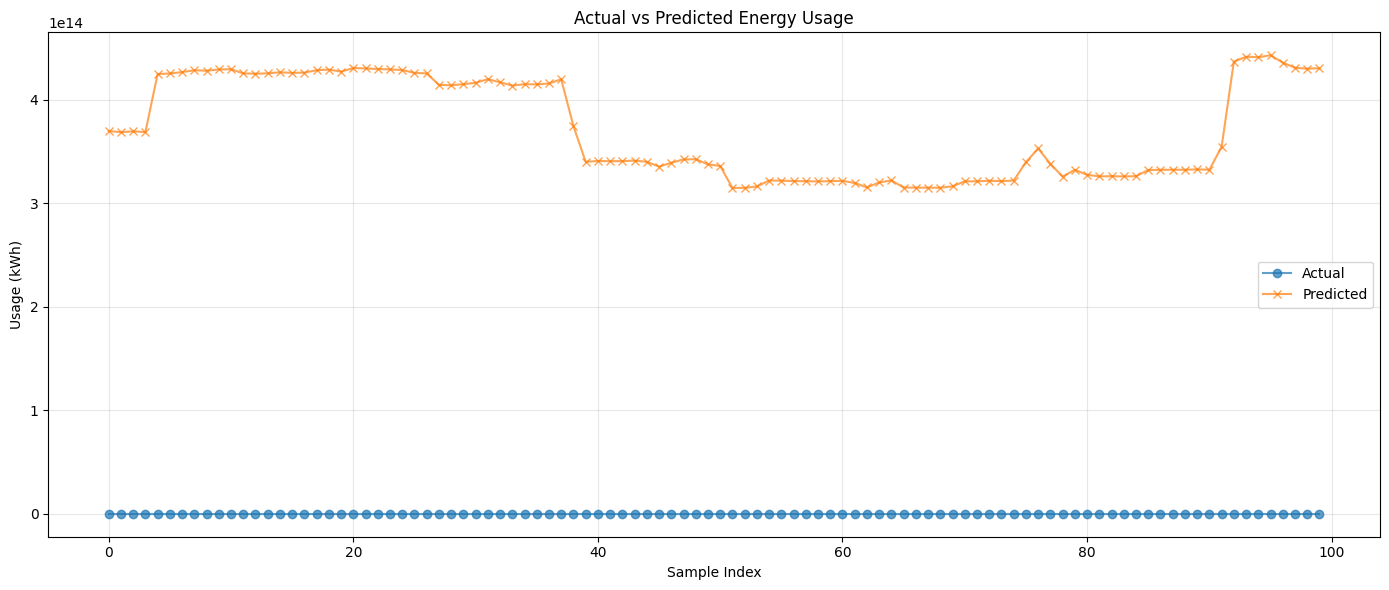

In [6]:
# Plot actual vs predicted
plt.figure(figsize=(14, 6))
plt.plot(df_sample['Usage_kWh'].values, label='Actual', marker='o', alpha=0.7)
plt.plot(df_sample['Predicted_Usage_kWh'].values, label='Predicted', marker='x', alpha=0.7)
plt.xlabel('Sample Index')
plt.ylabel('Usage (kWh)')
plt.title('Actual vs Predicted Energy Usage')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

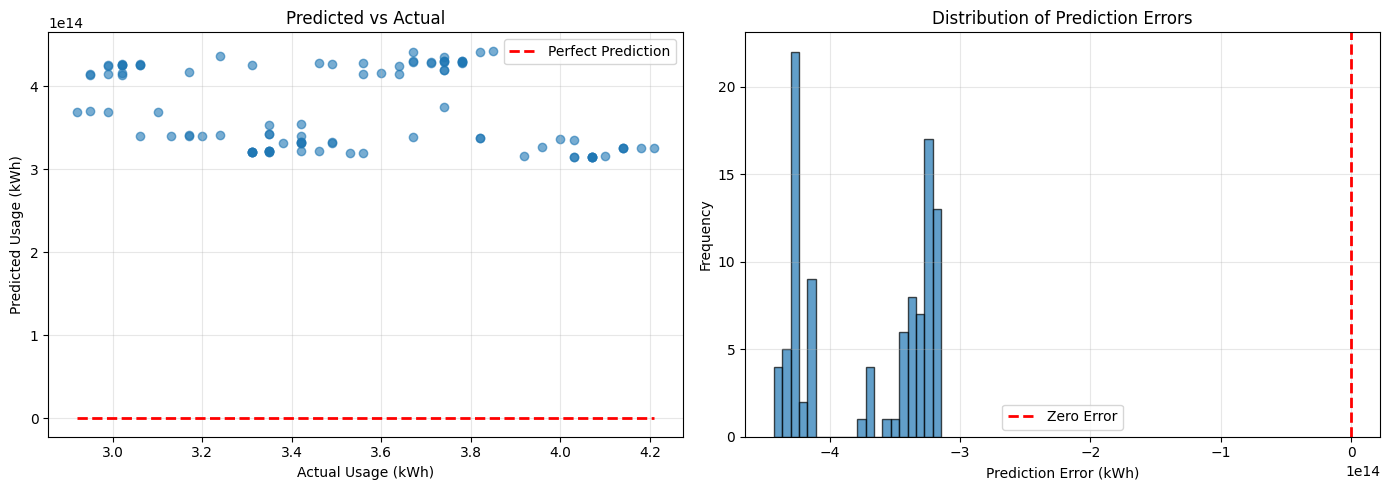

In [7]:
# Scatter plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Predicted vs Actual
axes[0].scatter(df_sample['Usage_kWh'], df_sample['Predicted_Usage_kWh'], alpha=0.6)
axes[0].plot([df_sample['Usage_kWh'].min(), df_sample['Usage_kWh'].max()],
             [df_sample['Usage_kWh'].min(), df_sample['Usage_kWh'].max()],
             'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Usage (kWh)')
axes[0].set_ylabel('Predicted Usage (kWh)')
axes[0].set_title('Predicted vs Actual')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Error distribution
axes[1].hist(df_sample['Error'], bins=20, edgecolor='black', alpha=0.7)
axes[1].axvline(x=0, color='r', linestyle='--', lw=2, label='Zero Error')
axes[1].set_xlabel('Prediction Error (kWh)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Prediction Errors')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Example 2: Single Prediction

Make a prediction for a single set of input values

In [8]:
# Create a single input sample
single_input = pd.DataFrame([{
    'date': '01/01/2018 12:00',
    'Lagging_Current_Reactive.Power_kVarh': 5.5,
    'Leading_Current_Reactive_Power_kVarh': 0.0,
    'CO2(tCO2)': 0.01,
    'Lagging_Current_Power_Factor': 65.0,
    'Leading_Current_Power_Factor': 100.0,
    'NSM': 43200,
    'WeekStatus': 'Weekday',
    'Day_of_week': 'Monday',
    'Load_Type': 'Medium_Load'
}])

print("Input data:")
print(single_input)

# Make prediction
single_prediction = predictor.predict(single_input)

print(f"\nPredicted Energy Usage: {single_prediction[0]:.2f} kWh")

Input data:
               date  Lagging_Current_Reactive.Power_kVarh  \
0  01/01/2018 12:00                                   5.5   

   Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                   0.0       0.01   

   Lagging_Current_Power_Factor  Leading_Current_Power_Factor    NSM  \
0                          65.0                         100.0  43200   

  WeekStatus Day_of_week    Load_Type  
0    Weekday      Monday  Medium_Load  

Preprocessing data...
Preprocessed data shape: (1, 46)
Feature matrix shape: (1, 44)

Making predictions...
Generated 1 predictions
Prediction range: 27092771342419.07 - 27092771342419.07

Predicted Energy Usage: 27092771342419.07 kWh


c:\Users\muham\anaconda3\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


## Example 3: Batch Predictions from File

Load data from a CSV file and save predictions

In [9]:
# Load data
input_file = '../dataset/Steel_industry_data.csv'
df_batch = pd.read_csv(input_file)

# Take last 1000 rows as example
df_batch = df_batch.tail(1000).copy()

print(f"Batch data shape: {df_batch.shape}")

# Make predictions
batch_predictions = predictor.predict(df_batch)

# Add to dataframe
df_batch['Predicted_Usage_kWh'] = batch_predictions

# Save to file
output_file = '../processed_data/batch_predictions.csv'
df_batch.to_csv(output_file, index=False)

print(f"\nPredictions saved to: {output_file}")
print(f"\nSample predictions:")
df_batch[['date', 'Usage_kWh', 'Predicted_Usage_kWh']].head()

Batch data shape: (1000, 11)

Preprocessing data...
Preprocessed data shape: (1000, 47)
Feature matrix shape: (1000, 44)

Making predictions...
Generated 1000 predictions
Prediction range: 252331890917338.59 - 442793583539555.69

Predictions saved to: ../processed_data/batch_predictions.csv

Sample predictions:


c:\Users\muham\anaconda3\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


,date,Usage_kWh,Predicted_Usage_kWh
34040,21/12/2018 14:15,69.62,3.272767e+14
34041,21/12/2018 14:30,60.34,3.262635e+14
34042,21/12/2018 14:45,57.74,3.261325e+14
34043,21/12/2018 15:00,68.04,3.288821e+14
34044,21/12/2018 15:15,67.68,3.283835e+14


## Using the Command Line Script

You can also use the prediction script from the command line:

```bash
# Basic usage
python scripts/predict.py --input data.csv --output predictions.csv

# With custom model
python scripts/predict.py --input data.csv --output predictions.csv --model models/custom_model.pkl
```

## Model Performance Summary

In [10]:
import json

# Load model info
with open('../models/model_info.json', 'r') as f:
    model_info = json.load(f)

print("\n" + "="*60)
print("MODEL PERFORMANCE SUMMARY")
print("="*60)
print(f"Model Name: {model_info['model_name']}")
print(f"Model Type: {model_info['model_type']}")
print(f"\nPerformance Metrics (on test set):")
print(f"  R² Score: {model_info['r2_score']:.4f}")
print(f"  RMSE: {model_info['rmse']:.4f}")
print(f"  MAE: {model_info['mae']:.4f}")
print(f"  MAPE: {model_info['mape']:.2f}%")
print(f"\nTraining Information:")
print(f"  Training samples: {model_info['training_samples']:,}")
print(f"  Test samples: {model_info['test_samples']:,}")
print(f"  Number of features: {model_info['n_features']}")
print("="*60)


MODEL PERFORMANCE SUMMARY
Model Name: LightGBM_Tuned
Model Type: LGBMRegressor

Performance Metrics (on test set):
  R² Score: 0.9988
  RMSE: 1.0918
  MAE: 0.6434
  MAPE: inf%

Training Information:
  Training samples: 28,032
  Test samples: 7,008
  Number of features: 44


## Tips for Best Results

1. **Input Data Format**: Ensure your input data has the same columns as the training data
2. **Date Column**: Include a 'date' column in format 'DD/MM/YYYY HH:MM' for temporal features
3. **Missing Values**: The predictor handles missing values, but try to provide complete data
4. **Feature Engineering**: The predictor automatically creates engineered features
5. **Batch Size**: For large datasets, consider processing in batches to manage memory

## Required Input Columns

Minimum required columns:
- `date` (datetime format)
- `Lagging_Current_Reactive.Power_kVarh`
- `Leading_Current_Reactive_Power_kVarh`
- `CO2(tCO2)`
- `Lagging_Current_Power_Factor`
- `Leading_Current_Power_Factor`
- `NSM` (seconds from midnight)
- `WeekStatus` (Weekday/Weekend)
- `Day_of_week` (Monday-Sunday)
- `Load_Type` (Light_Load/Medium_Load/Maximum_Load)